In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer, MinMaxScaler
%matplotlib inline

In [2]:
# Load data
train_base_sum = pd.read_csv("./data/train/base_train_sum.csv", encoding="gbk")
train_knowledge_sum = pd.read_csv("./data/train/knowledge_train_sum.csv", encoding="gbk")
train_money_report_sum = pd.read_csv("./data/train/money_report_train_sum.csv", encoding="gbk")
train_year_report_sum = pd.read_csv("./data/train/year_report_train_sum.csv", encoding="gbk")
verify_base = pd.read_csv("./data/verify/base_verify1.csv", encoding="gbk")
verify_money_info = pd.read_csv("./data/verify/money_information_verify1.csv", encoding="gbk")
verify_paient_info = pd.read_csv("./data/verify/paient_information_verify1.csv", encoding="gbk")
verify_year_report = pd.read_csv("./data/verify/year_report_verify1.csv", encoding="gbk")

In [3]:
def merge_base_knowledge(base, knowledge):
    # flag = 1 暂定表示为僵尸企业
    # flag除了1之外都是缺失值，使用0补齐，表示为非僵尸企业
    df = pd.merge(base, knowledge, on='ID')
    return df

train_base_knowledge = merge_base_knowledge(train_base_sum, train_knowledge_sum)
verify_base_knowledge = merge_base_knowledge(verify_base, verify_paient_info)

In [4]:
verify_base_knowledge.drop('控制人ID', axis=1, inplace=True)

In [5]:
verify_base_knowledge

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag,专利,商标,著作权
0,1500001,2010.0,6680.0,商业服务业,山东,股份有限公司,自然人,0.89,1.0,0.0,0.0,0.0
1,1500321,2001.0,9330.0,商业服务业,广东,股份有限公司,企业法人,0.72,1.0,0.0,0.0,0.0
2,1500395,2003.0,8670.0,交通运输业,广西,农民专业合作社,企业法人,0.60,1.0,1.0,1.0,0.0
3,1500614,2001.0,7730.0,工业,江西,集体所有制企业,企业法人,0.58,1.0,0.0,0.0,0.0
4,1501057,2002.0,6840.0,工业,福建,农民专业合作社,自然人,0.84,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30879,5999996,2011.0,2170.0,零售业,湖北,农民专业合作社,自然人,0.93,0.0,1.0,1.0,0.0
30880,5999997,2013.0,9030.0,交通运输业,福建,集体所有制企业,企业法人,0.73,0.0,1.0,1.0,0.0
30881,5999998,2014.0,4510.0,服务业,湖南,股份有限公司,自然人,0.64,0.0,0.0,0.0,0.0
30882,5999999,2014.0,9130.0,交通运输业,福建,股份有限公司,自然人,0.80,0.0,1.0,1.0,1.0


In [6]:
# train_base_knowledge['注册时间'].fillna(int(train_base_knowledge['注册时间'].mean()), inplace=True)
# train_base_knowledge['注册资本'].fillna(int(train_base_knowledge['注册资本'].mean()), inplace=True)
# train_base_knowledge['控制人持股比例'].fillna(int(train_base_knowledge['控制人持股比例'].mean()), inplace=True)
values = {'注册时间': int(train_base_knowledge['注册时间'].mean()), 
          '注册资本': int(train_base_knowledge['注册资本'].mean()), 
          '控制人持股比例': train_base_knowledge['控制人持股比例'].mean(),
          '行业': 'other',
          '区域': 'other',
          '企业类型': 'other',
          '控制人类型': 'other',
          '专利': 0,
          '商标': 0,
          'flag': 0,
          '著作权': 0,}
values2 = {'注册时间': int(verify_base_knowledge['注册时间'].mean()), 
          '注册资本': int(verify_base_knowledge['注册资本'].mean()), 
          '控制人持股比例': verify_base_knowledge['控制人持股比例'].mean(),
          '行业': 'other',
          '区域': 'other',
          '企业类型': 'other',
          '控制人类型': 'other',
          '专利': 0,
          '商标': 0,
          'flag': 0,
          '著作权': 0,}
train_base_knowledge.fillna(value=values, inplace=True)
verify_base_knowledge.fillna(value=values, inplace=True)

In [7]:
encoder = OneHotEncoder(sparse = False)
X_train = train_base_knowledge.to_numpy()
X_test = verify_base_knowledge.to_numpy()

In [8]:
X_train[0]

array([28, 2007.0, 2050.0, '交通运输业', '福建', '农民专业合作社', '企业法人',
       0.7555609952384151, 1.0, 0.0, 1.0, 1.0], dtype=object)

In [9]:
zh_train = X_train[:, 3:7]
X_train = np.delete(X_train, range(3, 7), axis = 1)
# X_train = X_train[:,19:]
zh_test = X_test[:, 3:7]
X_test = np.delete(X_test, range(3, 7), axis = 1)
# X_test = X_test[:,19:]

In [10]:
X_train

array([[28, 2007.0, 2050.0, ..., 0.0, 1.0, 1.0],
       [230, 2008.0, 3360.0, ..., 0.0, 0.0, 0.0],
       [429, 2005.0, 9670.0, ..., 1.0, 0.0, 0.0],
       ...,
       [5978031, 2008.0, 3290.0, ..., 0.0, 1.0, 1.0],
       [5978032, 2009.0, 6060.0, ..., 1.0, 0.0, 1.0],
       [5978033, 2002.0, 6960.0, ..., 0.0, 1.0, 1.0]], dtype=object)

In [11]:
ans_train = encoder.fit_transform(zh_train)
ans_test = encoder.fit_transform(zh_test)

In [12]:
ans_test

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [13]:
X_train = np.hstack((X_train,ans_train)).astype('float32')
X_test = np.hstack((X_test,ans_test)).astype('float32')

In [14]:
X_train = pd.DataFrame(X_train).rename(columns = {0: 'ID', 4: 'flag'})
X_test = pd.DataFrame(X_test).rename(columns = {0: 'ID', 4: 'flag'})

In [15]:
X_train

,ID,1,2,3,flag,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,28.0,2007.0,2050.0,0.755561,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,230.0,2008.0,3360.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,429.0,2005.0,9670.0,0.750000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,693.0,2011.0,8360.0,0.980000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,727.0,2001.0,8720.0,0.540000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15045,5978029.0,2014.0,460.0,0.710000,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15046,5978030.0,2004.0,1140.0,0.950000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15047,5978031.0,2008.0,3290.0,0.630000,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15048,5978032.0,2009.0,6060.0,0.510000,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
def merge_money_year(money, year): 
    money.loc[:,'year'] = money['year'].fillna(method='bfill')
    year.loc[:,'year'] = year['year'].fillna(method='bfill')
    df = pd.merge(money, year, on=['ID', 'year'])
    return df
train_money_year = merge_money_year(train_money_report_sum, train_year_report_sum)
verify_money_year  =merge_money_year(verify_money_info, verify_year_report)

In [17]:
train_money_year = train_money_year.sort_values(['ID', 'year'])
verify_money_year = verify_money_year.sort_values(['ID', 'year'])

In [18]:
for column in list(train_money_year.columns[train_money_year.isnull().sum() > 0]):
    mean_val = train_money_year[column].mean()
    train_money_year[column].fillna(mean_val, inplace=True)
for column in list(verify_money_year.columns[verify_money_year.isnull().sum() > 0]):
    mean_val = verify_money_year[column].mean()
    verify_money_year[column].fillna(mean_val, inplace=True)

In [19]:
x_train = pd.merge(train_money_year, X_train, on='ID')
x_verify = pd.merge(verify_money_year, X_test, on='ID')

In [20]:
x_verify

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本,...,22,23,24,25,26,27,28,29,30,31
0,1500001,2015.0,0.0,0.00,0.0,0.000,0.0,0.00000,334.0,20.040,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1500001,2016.0,0.0,0.00,0.0,0.000,84168.0,5050.08000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1500001,2017.0,0.0,0.00,0.0,0.000,91182.0,5470.92000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1500321,2015.0,0.0,0.00,0.0,0.000,721022.4,43261.34400,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1500321,2016.0,0.0,0.00,0.0,0.000,0.0,0.00000,6997.5,419.850,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92644,5999998,2016.0,0.0,0.00,8659.2,346.368,0.0,1568.00667,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
92645,5999998,2017.0,0.0,0.00,0.0,0.000,18265.5,1095.93000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
92646,5999999,2015.0,0.0,0.00,6025.8,241.032,0.0,0.00000,0.0,0.000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
92647,5999999,2016.0,7304.0,584.32,0.0,0.000,0.0,0.00000,0.0,0.000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
y_train = []
y_verify = []
i = 0
while i < len(x_train):
    y_train.append(x_train['flag'][i])
    i += 3

i = 0
while i < len(x_verify):
    y_verify.append(x_verify['flag'][i])
    i += 3

In [22]:
y_train = np.array(y_train).reshape(-1, 1)
y_verify = np.array(y_verify).reshape(-1, 1)

In [23]:
x_train.drop('flag', axis=1, inplace=True)
x_verify.drop('flag', axis=1, inplace=True)

In [24]:
x_train_np = x_train.values
x_verify_np = x_verify.values

In [25]:
x_train

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本,...,22,23,24,25,26,27,28,29,30,31
0,28,2015.0,0.0,0.00,0.0,0.00,21648.0,1298.880,0.0,0.000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28,2016.0,0.0,0.00,34686.0,1387.44,0.0,0.000,0.0,0.000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,2017.0,0.0,0.00,3444.0,137.76,0.0,0.000,0.0,0.000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,230,2015.0,0.0,0.00,0.0,0.00,0.0,0.000,470.4,28.224,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,230,2016.0,0.0,0.00,0.0,0.00,46771.2,2806.272,0.0,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45139,5978032,2016.0,12726.0,1018.08,0.0,0.00,0.0,0.000,0.0,0.000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45140,5978032,2017.0,0.0,0.00,0.0,0.00,0.0,0.000,2908.8,174.528,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45141,5978033,2015.0,18096.0,1447.68,0.0,0.00,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45142,5978033,2016.0,0.0,0.00,0.0,0.00,254318.4,15259.104,0.0,0.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
x_train_np  = Normalizer().fit_transform(x_train_np)
x_verify_np = Normalizer().fit_transform(x_verify_np)

In [27]:
x_train_np.shape

(45144, 49)

In [28]:
train = x_train_np.reshape(-1, 3, 49)
verify = x_verify_np.reshape(-1, 3, 49)

In [39]:
print(train.shape, y_train.shape)
y_verify

(15048, 3, 49) (15048, 1)


array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, ConvLSTM2D

In [42]:

def create_model(load=False):
    model = keras.models.Sequential([
        LSTM(500, input_shape=(3, 49), return_sequences=True),
        Dropout(0.25),
        LSTM(200, activation='relu'),
        Dropout(0.25),
        Dense(1)
    ])
    model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
    if load:
        model.load_weights('./weights')
    return model

In [44]:
def create_model1(load=False):
    model = keras.models.Sequential([
        ConvLSTM2D(64, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(3, 49),return_sequences=True),
        Dropout(0.25),
        LSTM(32, activation='relu'),
        Dropout(0.25),
        Dense(1)
    ])
    model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
    if load:
        model.load_weights('./weights')
    return model

In [48]:
model = create_model()

In [49]:
EPOCHS = 100

model.fit(train, y_train, epochs=EPOCHS, batch_size=100,  validation_split=0.3)

Train on 10533 samples, validate on 4515 samples
Epoch 1/100
10533/10533 [==============================] - 17s 2ms/sample - loss: 0.1742 - accuracy: 0.7460 - val_loss: 0.0339 - val_accuracy: 0.9989
Epoch 2/100
10533/10533 [==============================] - 10s 908us/sample - loss: 0.1351 - accuracy: 0.7980 - val_loss: 0.0113 - val_accuracy: 0.9996
Epoch 3/100
10533/10533 [==============================] - 10s 954us/sample - loss: 0.1175 - accuracy: 0.8206 - val_loss: 4.2002e-04 - val_accuracy: 1.0000
Epoch 4/100
10533/10533 [==============================] - 10s 908us/sample - loss: 0.1026 - accuracy: 0.8464 - val_loss: 2.7459e-04 - val_accuracy: 1.0000
Epoch 5/100
10533/10533 [==============================] - 10s 943us/sample - loss: 0.0892 - accuracy: 0.8714 - val_loss: 2.5894e-04 - val_accuracy: 1.0000
Epoch 6/100
10533/10533 [==============================] - 10s 934us/sample - loss: 0.0782 - accuracy: 0.8888 - val_loss: 4.7296e-05 - val_accuracy: 1.0000
Epoch 7/100
10533/10533 [

10533/10533 [==============================] - 9s 815us/sample - loss: 0.0312 - accuracy: 0.9569 - val_loss: 7.7413e-05 - val_accuracy: 1.0000
Epoch 54/100
10533/10533 [==============================] - 9s 810us/sample - loss: 0.0254 - accuracy: 0.9656 - val_loss: 2.5558e-06 - val_accuracy: 1.0000
Epoch 55/100
10533/10533 [==============================] - 9s 821us/sample - loss: 0.0299 - accuracy: 0.9606 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 56/100
10533/10533 [==============================] - 9s 811us/sample - loss: 0.0337 - accuracy: 0.9557 - val_loss: 1.9354e-04 - val_accuracy: 1.0000
Epoch 57/100
10533/10533 [==============================] - 9s 814us/sample - loss: 0.0218 - accuracy: 0.9709 - val_loss: 2.1377e-06 - val_accuracy: 1.0000
Epoch 58/100
10533/10533 [==============================] - 9s 814us/sample - loss: 0.0317 - accuracy: 0.9578 - val_loss: 5.7464e-05 - val_accuracy: 1.0000
Epoch 59/100
10533/10533 [==============================] - 9s 817us/sample - los

In [50]:
predict_res = model.predict(verify)

In [52]:
predict_res

array([[-0.00763761],
       [-0.01313618],
       [-0.00162786],
       ...,
       [ 0.00400671],
       [ 0.00030199],
       [ 0.00072224]], dtype=float32)

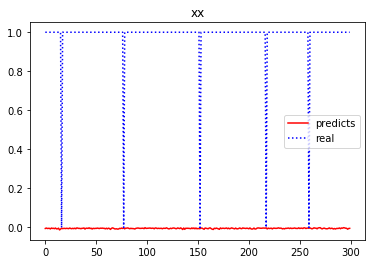

In [51]:
plt.figure()
plt.plot(range(len(predict_res[500:800])), predict_res[500:800], 'r', label='predicts')
plt.plot(range(len(y_verify[500:800])), y_verify[500:800], 'b', label='real', linestyle=':')
plt.title('xx')
plt.legend()
plt.show()